In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [68]:
df = pd.read_csv('weight-height.csv')
df = df.drop(columns=["Gender"])
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Height')

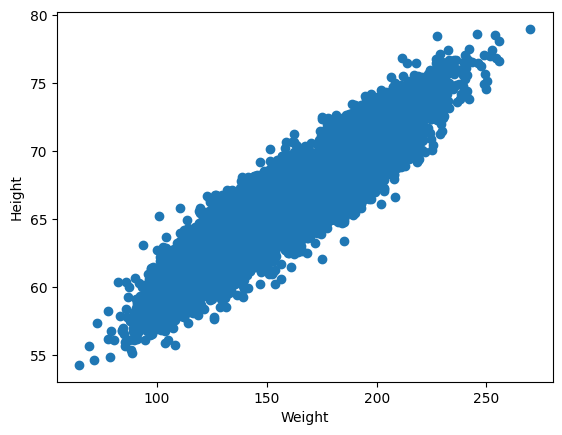

In [69]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

## divide our datas

In [70]:
X = df[["Weight"]]
y = df[["Height"]]

In [71]:
type(X)

pandas.core.frame.DataFrame

In [72]:
from sklearn.model_selection import train_test_split


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 45)

In [74]:
X.shape

(10000, 1)

In [75]:
type(X_test),type(X_train)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [76]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

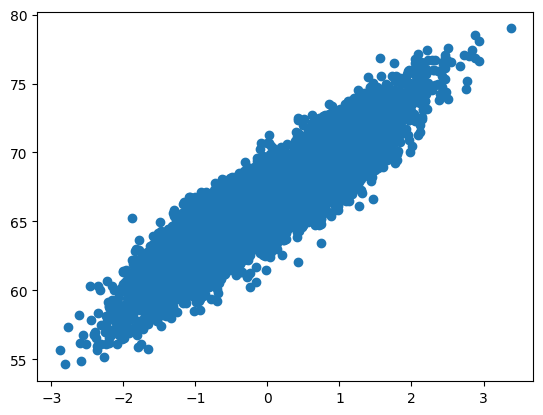

In [79]:
plt.scatter(X_train,y_train)

In [80]:
## Train the simple linear regrssion model
from sklearn.linear_model import LinearRegression

In [81]:
regressor = LinearRegression()

In [82]:
type(X_train),type(y_test)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [83]:
regressor.fit(X_train,y_train)

LinearRegression()

In [84]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept",regressor.intercept_)

The slope or coefficient of weight is  [[3.56310283]]
Intercept [66.36266983]


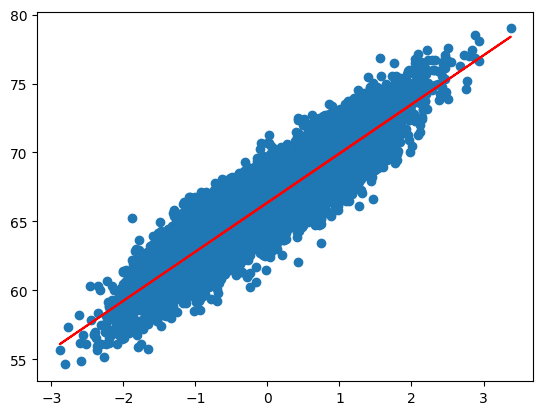

In [85]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color = 'red')

In [86]:
Y_pred_test = regressor.predict(X_test)

In [87]:
Y_pred_test,y_test

(array([[70.5669389 ],
        [66.8173219 ],
        [64.15558719],
        ...,
        [66.87695567],
        [64.8884814 ],
        [67.91064467]]),
          Height
 4132  70.447792
 6553  68.874269
 7604  66.228132
 585   69.750597
 5924  65.020314
 ...         ...
 193   72.799224
 7500  64.524147
 2949  64.821504
 9842  66.419263
 2025  68.037734
 
 [2000 rows x 1 columns])

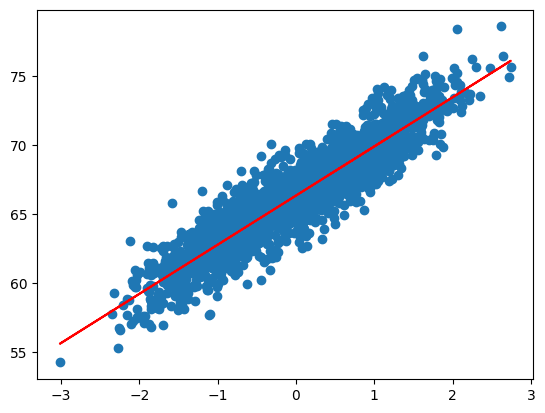

In [88]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),color = 'red')

## Performace metrics
## MSE,MAE,RMSE
## R Square and adjusted R square

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [90]:
mse = mean_squared_error(y_test,Y_pred_test)
mae = mean_absolute_error(y_test,Y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.158831317350692
1.170928980017486
1.4692961979637367


## R Square

In [91]:
from sklearn.metrics import r2_score
score = r2_score(y_test,Y_pred_test)

In [92]:
score

0.8528026687040331

## new pred

In [93]:
scaled_weight = scaler.transform([[241]])
scaled_weight

C:\Users\love sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2.47599167]])

In [94]:
print(regressor.predict([scaled_weight[0]]))

[[75.18488277]]


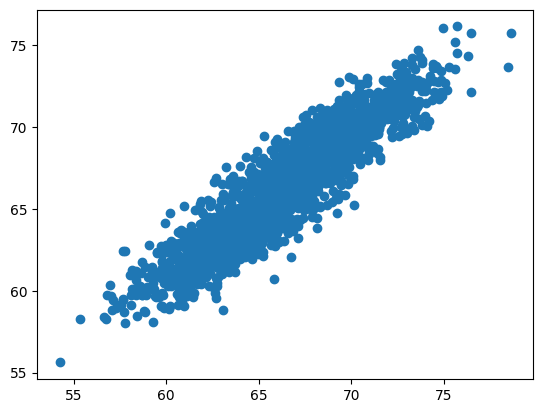

In [95]:
## Assumption
## plot a scatter plot for the prediction
plt.scatter(y_test,Y_pred_test)

In [96]:
## Residual
residual = y_test-Y_pred_test
residual

,Height
4132,-0.119147
6553,2.056947
7604,2.072545
585,0.732216
5924,-0.814253
...,...
193,0.142504
7500,1.744887
2949,-2.055452
9842,1.530782


C:\Users\love sharma\AppData\Local\Temp\ipykernel_8092\3290128055.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: ylabel='Density'>

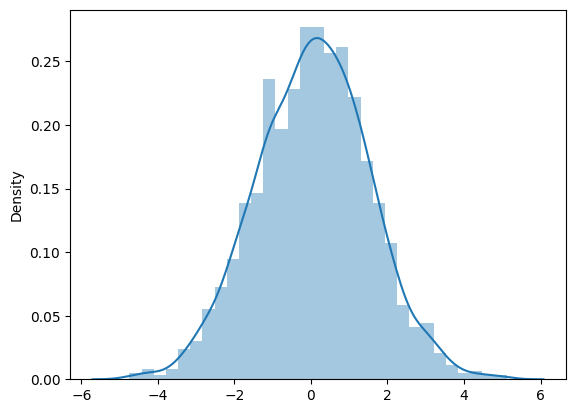

In [97]:
import seaborn as sns
sns.distplot(residual,kde=True) 

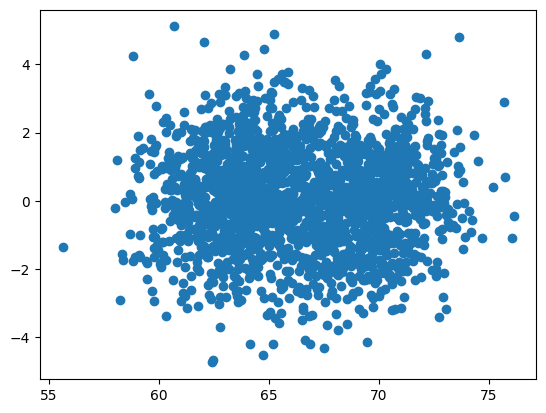

In [98]:
plt.scatter(Y_pred_test,residual)